<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTrXWw8bCPdfU-7SaDF8fQChBdI9iGrblZBXLLb6PmbI07T7XTA'/>

# Table of Contents
***

## Introduction to Random Forest
- [Guessing Game](#fun)

- [What are Ensembles? Why?](#Ensemble)

- [Pre-requisites: Decision Trees & Bootstrap](#RF)

- [What is Random? What is Forest?](#school_attendance)
    
- [How it Works](#school_attendance)
    
- [Advantages and Disadvantages of RF](#school_attendance)
    
- [Parametric VS Non-Parametric Models](#school_attendance)


## Random Forest Implementation
### Base Random Forest
- [Fitting on Numerical Features](#correlation)

- [Fitting on Categorical+Numerical Features](#race_economic)

- [Evaluate Scores](#school_attendance)

### Important Hyperparameters 
- [Understand n_estimators](#correlation)

- [Understand max_features](#race_economic)

- [Understand min_samples_leaf](#school_attendance)

- [Understand n_jobs](#school_attendance)

- [Understand random_state](#school_attendance)

- [Understand oob_score](#school_attendance)

- [Final Model & Compare Scores](#final)

## Best Practice for Interpreting Random Forest
- [Linear Equation VS Random Forest Equation](#equation)
- [Feature Importance](#math_test)
- [Stress Testing (Partial Dependency Plot)](#math_test)
- [Checking Individual Decision Trees](#math_test)

## Conclusion
- [Highlights](#correlation)
- [Use Cases](#correlation)
- [Questions](#correlation)


# Introduction to Random Forest
***

## What are Ensembles? Why?

A method by which a large number of **weak/moderate learners**(or learning algorithms) can merge to produce a **better and more robust decision maker**.

**Why Ensemble Methods Work:**
The reason ensembles work is because of the **diversity** in the learners and any method of increasing diversity works in favour of the learner. 

**Bagging reduces variance of low-bias models**
- Low bias models are "complex" and unstable
- Bagging averages them together to create stability


## Pre-Requisites: Decision Trees & Bootstrap

<img src='https://i.stack.imgur.com/avUHd.png'/>

## Benefits of Tree-Based Models

- Works for both classification and regression
- Handles categorical features naturally
- No assumption of distributions
- Can handle non-linear interactions 
- No need for feature scaling / transformation
- Handles missing values in the variables

## What is Random Forest? How it works?

Random Forest is just a collection of random decision trees. It achieves a lower test error solely by **variance reduction**. Therefore increasing the number of trees in the ensemble won't have any effect on the bias of your model. **Higher number of trees will only reduce the variance of your model**. Moreover you can achieve a higher variance reduction by reducing the correlation between trees in the ensemble. This is the reason why we randomly select 'm' attributes at each split because it will introduce some randomness in to the ensemble and reduce the correlation between trees. Hence 'm' is the major attribute to be tuned in a random forest ensemble.

- Random = Random subsets of features and observations used to build the trees
- Forest = Number of decision trees used to ensemble 

**How it works:**
1. Select a random sample of features and observations(with replacement) from the entire dataset.
2. For each feature (node) you'll test different thresholds and see which gives you the best split criterion (generally entropy, gini, information gain).
3. Keep the feature and its threshold that makes the best split and repeat for each other feature
4. Stop after a you completely reach a single leaf node or a stopping criterion (max_depth size or min_samples_leaf)

**Goal**: Individual trees have low bias but high variance. By ensembling a lot of trees together you're going to reduce the variance, while not increasing the bias. You want each tree to be as different as possible and learn/capture different patterns from the data. 

Random Forest essentially reduces the overfitting problem and is what makes it so accurate!

<img src='https://cdn-images-1.medium.com/max/1000/1*Wf91XObaX2zwow7mMwDmGw.png'/>


## Pros & Cons

**Advantages**: 
- Built in cross validation (OOB Scores)
- Built in Feature Selection (implicit)
- Feature importance
- Default hyper parameters are great and Works well "off the shelf"
- Minimum hyper parameter tuning
- RF natively detects interactions 
- It's parametric (you don't have to make any assumptions of your data)

**Disadvantages**:
- RF is a black box (It's literally a function of 1000 decision trees)
- It doesn't tell you "how" the features are important

<img src='https://image.slidesharecdn.com/oscon-kaggle-20-110725173627-phpapp02/95/the-hitchhikers-guide-to-kaggle-15-728.jpg?cb=1322323726'/>

# Random Forest Implementation
***
## Import Libraries

In [ ]:
__author__ = "Data Science Dream Job"
__copyright__ = "Copyright 2018, Data Science Dream Job LLC"
__email__ = "info@datasciencedreamjob.com"

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplot
import numpy as np

%matplotlib inline


## Import Titanic Dataset

In [2]:
# Import the Titanic Dataset
X = pd.read_csv('C:/Users/Randy/Downloads/titanic_train.csv')
y = X.pop("Survived")

In [3]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Quick Data Cleaning and Data Imputation

- **Dummified** categorical features (Sex, Cabin, Embarked)
- **Imputed** missing values in features (Age, Cabin, Embarked)
- **Dropped** unimportant features (PassengerId, Name, Ticket)

In [4]:
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return "None"
    
# Clean Cabin
X["Cabin"] = X.Cabin.apply(clean_cabin)

# Define categorical features
categorical_variables = ["Sex", "Cabin", "Embarked"]

# Impute missing age with median
X["Age"].fillna(X["Age"].median(), inplace=True)

# Drop PassengerId, Name, Ticket
X.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

# Impute missing categorical variables and dummify them
for variable in categorical_variables:
    X[variable].fillna("Missing", inplace=True)
    dummies = pd.get_dummies(X[variable], prefix=variable)
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

### Split into Train & Test Set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train on Numeric Features

In [6]:
# Get a list of numerica features
numeric_variables = ['Pclass','Age','SibSp','Parch','Fare']
X_numeric = X_train[numeric_variables]
X_numeric.head()

,Pclass,Age,SibSp,Parch,Fare
331,1,45.5,0,0,28.5000
733,2,23.0,0,0,13.0000
382,3,32.0,0,0,7.9250
704,3,26.0,1,0,7.8542
813,3,6.0,4,2,31.2750


In [7]:
X_numeric["Age"].fillna(X_numeric["Age"].mean(), inplace=True)

C:\Users\Randy\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


# Random Forest Baseline Model (1)

In [8]:
# Create the baseline 
model_1 = RandomForestClassifier(oob_score=True, random_state=42)

### Out-of-Bag Score (Built in Cross Validation) 

In [9]:
# Fit and Evaluate OOB
model_1 = model_1.fit(X_numeric, y_train)

# Calculate OOB Score
print("The OOB Score is: " + str(model_1.oob_score_))

The OOB Score is: 0.654494382022


C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


### Cross Validation Score

In [10]:
rf_result = cross_val_score(model_1, X_numeric, y_train, scoring='accuracy')

rf_result.mean()

C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

0.66011299034381687

### AUC Score

In [11]:
# AUC Score
pred_train = np.argmax(model_1.oob_decision_function_,axis=1)
rf_numeric_auc = roc_auc_score(y_train, pred_train)
rf_numeric_auc

0.61352023665456501

# Train on Categorical and Numerical Features

### Copy original training set

In [12]:
# Copy the whole train set
X_cat = X_train

### Final Training Set

In [13]:
X_cat.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
331,1,45.5,0,0,28.500,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
733,2,23.0,0,0,13.000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
382,3,32.0,0,0,7.925,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


# Random Forest Baseline Model (2)

In [14]:
# Create the baseline 
model_2 = RandomForestClassifier(oob_score=True, random_state=40)

### Out-of-Bag Score (Built in Cross Validation) 

In [15]:
# Fit and Evaluate OOB
model_2 = model_2.fit(X_cat, y_train)

# Calculate OOB Score
print("The OOB Score is: " + str(model_2.oob_score_))

The OOB Score is: 0.796348314607


C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


### Feature Scaling?
**Does Scaling Affect Performance? Is it neccessary for tree based models?**

In [16]:
X_cat_scaled = StandardScaler().fit(X_cat).transform(X_cat)
X_cat_scaled

array([[-1.61413602,  1.25364106, -0.47072241, ..., -0.05307449,
        -0.30335547,  0.59681695],
       [-0.40055118, -0.47728355, -0.47072241, ..., -0.05307449,
        -0.30335547,  0.59681695],
       [ 0.81303367,  0.21508629, -0.47072241, ..., -0.05307449,
        -0.30335547,  0.59681695],
       ..., 
       [ 0.81303367,  0.90745614,  1.23056874, ..., -0.05307449,
        -0.30335547,  0.59681695],
       [-1.61413602, -1.1696534 ,  0.37992316, ..., -0.05307449,
        -0.30335547,  0.59681695],
       [-1.61413602, -0.63114352, -0.47072241, ..., -0.05307449,
        -0.30335547,  0.59681695]])

### Fit Standardized Training Set

In [17]:
# Create the baseline 
model_3= RandomForestClassifier(oob_score=True, random_state=40)

# Fit and Evaluate OOB
model_3 = model_3.fit(X_cat_scaled, y_train)

# Calculate OOB Score
model_3.oob_score_

C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.7963483146067416

### AUC Score

In [18]:
# AUC Score
pred_train = np.argmax(model_2.oob_decision_function_,axis=1)
rf_cat_auc = roc_auc_score(y_train, pred_train)
rf_cat_auc

0.76941306978620416

## Baseline RF Model Evaluation (ROC AUC)

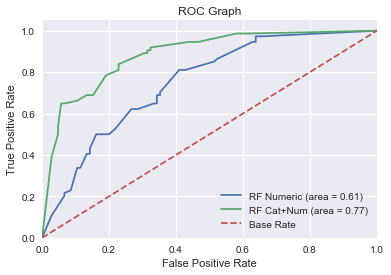

In [19]:
# Create ROC Graph
from sklearn.metrics import roc_curve
rf_numeric_fpr, rf_numeric_tpr, rf_numeric_thresholds = roc_curve(y_test, model_1.predict_proba(X_test[X_numeric.columns])[:,1])
rf_cat_fpr, rf_cat_tpr, rf_cat_thresholds = roc_curve(y_test, model_2.predict_proba(X_test)[:,1])

# Plot Random Forest Numeric ROC
plt.plot(rf_numeric_fpr, rf_numeric_tpr, label='RF Numeric (area = %0.2f)' % rf_numeric_auc)

# Plot Random Forest Cat+Numeric ROC
plt.plot(rf_cat_fpr, rf_cat_tpr, label='RF Cat+Num (area = %0.2f)' % rf_cat_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1], ls="--", label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

# Important Parameters 
***
### Parameters that will make your model better
- **max_depth:** The depth size of a tree
- **n_estimators:** The number of trees in the forest. Generally, the more trees the better accuracy, but slower computation.
- **max_features**: The max number of features that the algorithm can assign to an individual tree. Try ['auto', 'None', 'sqrt', 'log2', 0.9 and 0.2]
- **min_samples_leaf:** The minimum number of samples in newly created leaves. Try [1,2,3]. If 3 is best, try higher numbers.

### Parameters that will make your model faster
- **n_jobs**: Determines the amount of multiple processors should be used to train/test the model. Always use -1 to use max cores and it'll run much faster
- **random_state**: Set this to a number (42) for reproducibility. It's used to replicate your results and for others as well.
- **oob_score** Random Forest's custom validation method: out-of-bag prediction

### Max Depth

The more depth (deeper the tree) means the higher chance of overfitting

C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


1 depth
AUC Train:  0.896799784859
AUC Test:  0.714800514801
 
2 depth
AUC Train:  0.893202904397
AUC Test:  0.725868725869
 
3 depth


C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


AUC Train:  0.928936399086
AUC Test:  0.802187902188
 
4 depth


C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


AUC Train:  0.936499932769
AUC Test:  0.78667953668
 
5 depth


C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


AUC Train:  0.953996907355
AUC Test:  0.790669240669
 
10 depth


C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


AUC Train:  0.964518623101
AUC Test:  0.783912483912
 
20 depth
AUC Train:  0.971981309668
AUC Test:  0.795431145431
 
50 depth
AUC Train:  0.97909103133
AUC Test:  0.779150579151
 
100 depth
AUC Train:  0.980570122361
AUC Test:  0.765637065637
 


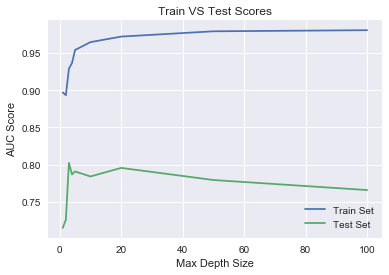

In [20]:
results  =  []
results2 = []
max_depth_size  = [1,2,3,4,5,10,20,50,100]

for depth in max_depth_size:
    model = RandomForestClassifier(depth, oob_score=True, n_jobs=-1, random_state=44)
    #model.fit(X, y)
    model.fit(X_train, y_train)
    print(depth, 'depth')
    pred = model.predict(X_train)
    pred2 = model.predict(X_test)
    roc1 = roc_auc_score(y_train, pred)
    roc2 = roc_auc_score(y_test, pred2)
    print('AUC Train: ', roc1)
    print('AUC Test: ', roc2)
    results.append(roc1)
    results2.append(roc2)
    print (" ")

plt.plot(max_depth_size, results, label='Train Set')
plt.plot(max_depth_size, results2, label='Test Set')
plt.xlabel('Max Depth Size')
plt.ylabel('AUC Score')
plt.title('Train VS Test Scores')
plt.legend(loc="lower right")
plt.show()

### n_estimators

Generally the more trees the better. You'll generalize better with more trees and reduce the variance more. The only downside is computation time.

1 trees
AUC:  0.664325842697
 
2 trees
AUC:  0.686797752809
 
3 trees
AUC:  0.72893258427
 
4 trees
AUC:  0.751404494382
 
5

C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Randy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

 trees
AUC:  0.755617977528
 
15 trees
AUC:  0.789325842697
 
20 trees
AUC:  0.796348314607
 
25 trees
AUC:  0.793539325843
 
40 trees
AUC:  0.797752808989
 
50 trees
AUC:  0.796348314607
 
70 trees
AUC:  0.797752808989
 
100 trees
AUC:  0.799157303371
 


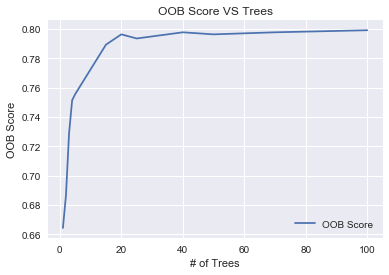

In [21]:
results = []
n_estimator_options = [1, 2, 3, 4, 5, 15, 20, 25, 40, 50, 70, 100]

for trees in n_estimator_options:
    model = RandomForestClassifier(trees, oob_score=True, random_state=42)
    #model.fit(X, y)
    model.fit(X_train, y_train)
    print(trees, 'trees')
    AUC = model.oob_score_
    print('AUC: ', AUC)
    results.append(AUC)
    print (" ")
    
plt.plot(n_estimator_options, results, label='OOB Score')
plt.xlabel('# of Trees')
plt.ylabel('OOB Score')
plt.title('OOB Score VS Trees')
plt.legend(loc="lower right")
plt.show()

### Max Features

auto option
AUC:  0.799157303371
 
None option
AUC:  0.796348314607
 
sqrt option
AUC:  0.799157303371
 
log2 option
AUC:  0.799157303371
 
0.7 option
AUC:  0.796348314607
 
0.2 option
AUC:  0.799157303371
 


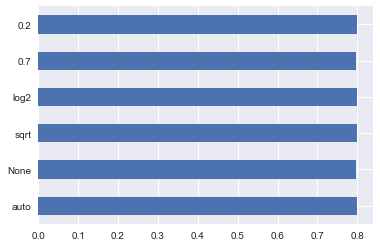

In [22]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.7, 0.2]

for max_features in max_features_options:
    model = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X_train, y_train)
    print(max_features, "option")
    auc = model.oob_score_
    print('AUC: ', auc)
    results.append(auc)
    print (" ")
    
pd.Series(results, max_features_options).plot(kind='barh')

### Min Sample Leafs

1 min samples
AUC:  0.799157303371
 
2 min samples
AUC:  0.821629213483
 
3 min samples
AUC:  0.818820224719
 
4 min samples
AUC:  0.828651685393
 
5 min samples
AUC:  0.825842696629
 
6 min samples
AUC:  0.817415730337
 
7 min samples
AUC:  0.813202247191
 
8 min samples
AUC:  0.811797752809
 
9 min samples
AUC:  0.810393258427
 
10 min samples
AUC:  0.807584269663
 
20 min samples
AUC:  0.804775280899
 


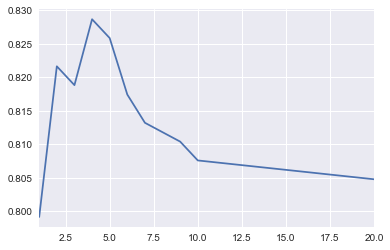

In [23]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,20]

for min_samples in min_samples_leaf_options:
    model = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features="auto", min_samples_leaf=min_samples)
    model.fit(X_train, y_train)
    print(min_samples, "min samples")
    auc = model.oob_score_
    print('AUC: ', auc)
    results.append(auc)
    print (" ")
    
pd.Series(results, min_samples_leaf_options).plot()

# Best Practice for Interpreting Random Forest

# Interpreting Individual trees

In [24]:
# The amount of trees used to ensemble
model_2.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=1751002438, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=618510555, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=237795335, splitter='best'),
 DecisionTreeClassifier(

### Visualize a single decision tree

In [25]:
Xx = pd.read_csv('C:/Users/Randy/Downloads/titanic_train.csv')
Xx.Survived.value_counts(1)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [26]:
X_train.shape

(712, 20)

### Each node in a tree contains:
1. The splitting criteria of the attribute (Sex_male <= 0.5)
2. Has the bootstrap sample (ex. 451/712 --> 67% of the data)
3. Class value of the sample (ex. [448, 264] --> 448 0's, 264 1's)
4. Final class outcome (classification is majority vote, regression is MSE)
5. Cost Function (Gini - used to interpret how good of a split we made)

#### Gini 
- We use the Gini Index as our cost function used to evaluate splits in the dataset.
- A Gini score gives an idea of how good a split is by how mixed the classes are in the two groups created by the split. 
- A perfect separation results in a Gini score of 0 (ex. [0,25])
- Whereas the worst case split that results in 50/50 classes.


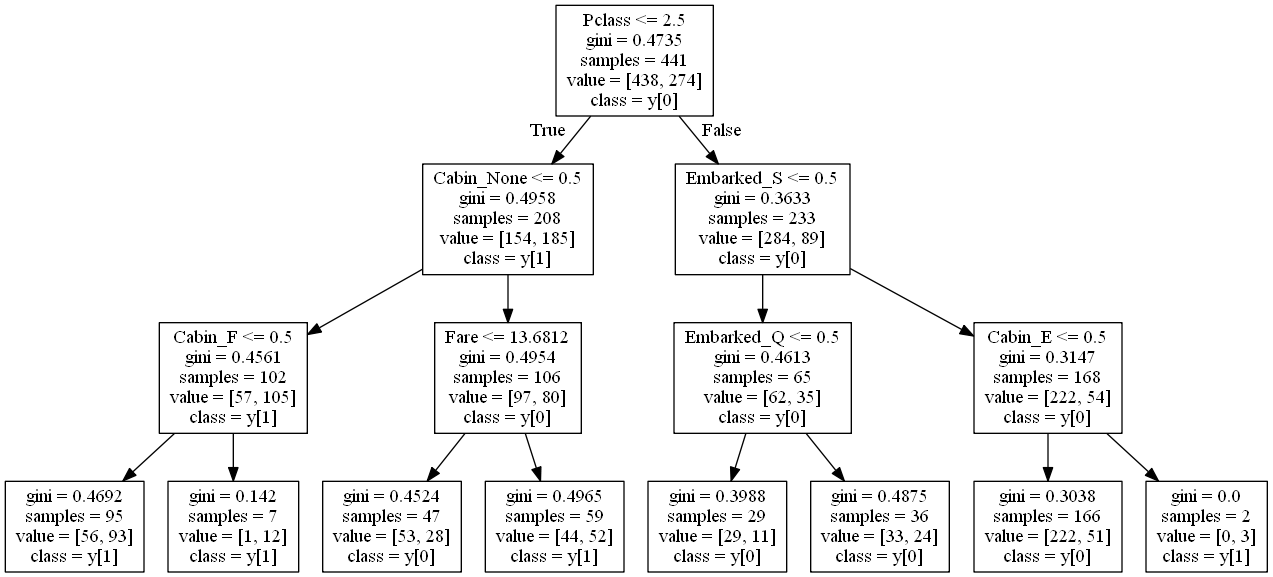

In [27]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus


m = RandomForestClassifier(n_estimators=1, max_depth=3)
m = m.fit(X_train, y_train)
# Create DOT data
dot_data = tree.export_graphviz(m.estimators_[0], out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### Visualize Entire Decision Tree

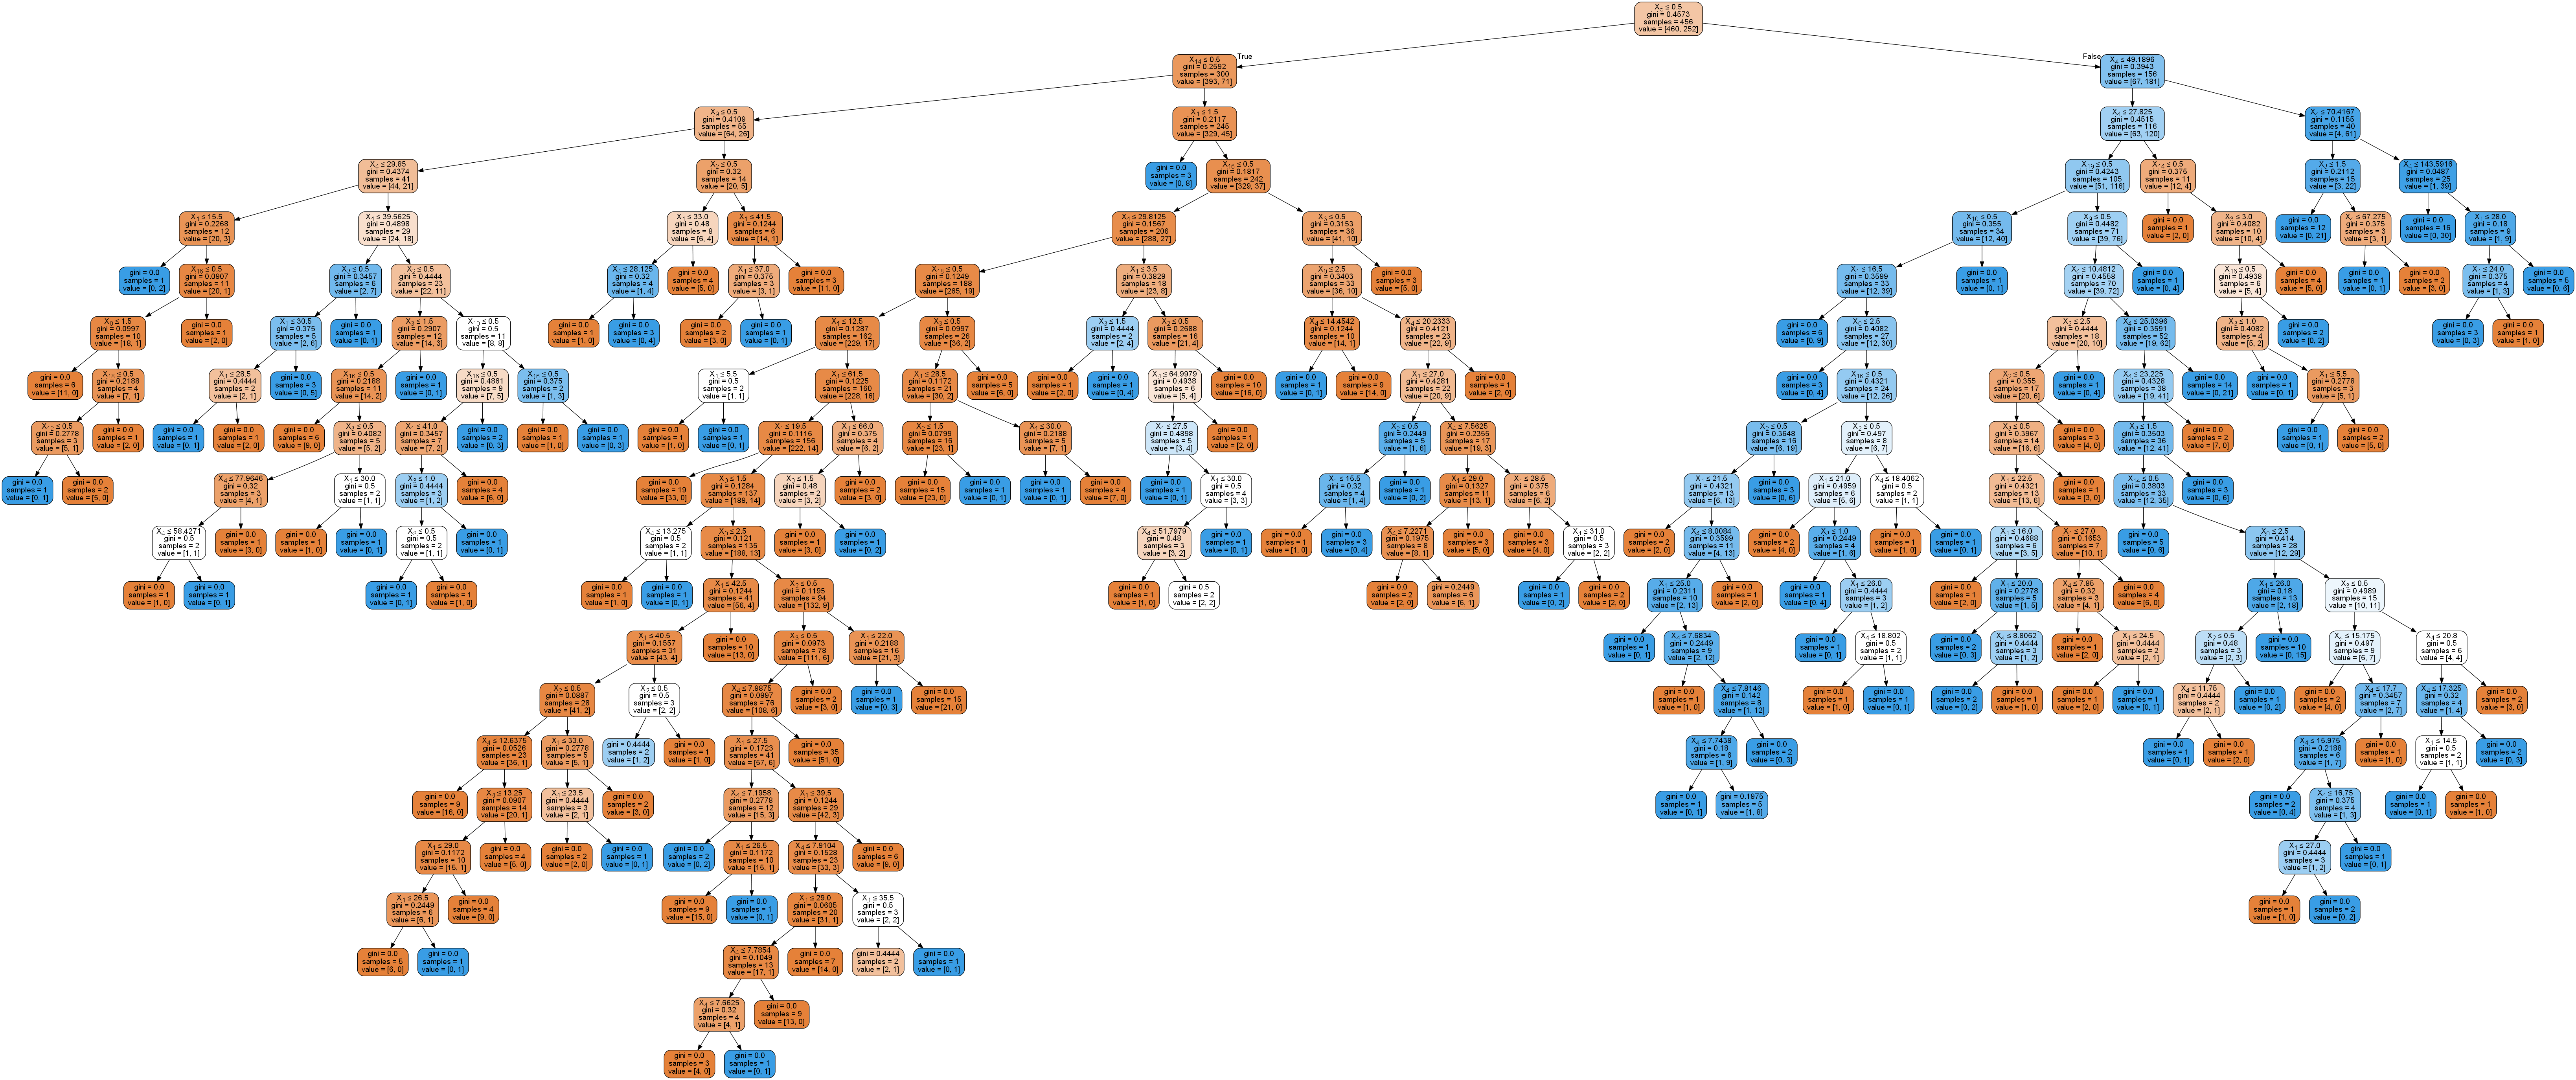

In [28]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model_2.estimators_[0], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

# Feature Importance

Feature selection  - implicit feature selection whereas models like LASSO is explicit.

A feature’s importance is the increase in the model’s prediction error after we permuted the feature’s values (breaks the relationship between the feature and the outcome).

**What does it mean:** The important features are more correlated with the dependent variable and contribute more variance to the dependent varaible. 

**How does it work:**
1. Train Random Forest Model
2. Find prediction score of model (benchmark score)
3. For each feature, shuffle it's value to alter it and look at prediction performance.
4. Compare it with benchmark score. If the altered feature hurts the score, then it's a bad feature. 


If you work with linear models then there is quite simple distinction if feature is "positive" or "negative", because the only impact it can have on the final result is being added (with weight). Nothing more. However, ensemble of decision trees can have arbitrary complex rules for each feature, for example "if book has red cover and have more than 100 pages then if it contains dragons it gets high score" but "if book has blue cover and more than 100 pages then if it contains dragons it gets low score" and so on.

Feature importance only gives you notion which features contributes to the decision, not "which way", because sometimes it will work this, and sometimes the other way.

In [29]:
model_2.feature_importances_

array([  6.80748759e-02,   2.24240737e-01,   6.92844117e-02,
         3.76706126e-02,   2.06602815e-01,   1.52019649e-01,
         1.24476553e-01,   2.13730604e-03,   5.80274670e-03,
         1.43312769e-02,   1.11597845e-02,   1.61675035e-02,
         3.77872119e-03,   3.10565152e-03,   2.61347026e-02,
         1.52152843e-04,   1.50912809e-02,   0.00000000e+00,
         5.61791538e-03,   1.41513042e-02])

Pclass              0.068075
Age                 0.224241
SibSp               0.069284
Parch               0.037671
Fare                0.206603
Sex_female          0.152020
Sex_male            0.124477
Cabin_A             0.002137
Cabin_B             0.005803
Cabin_C             0.014331
Cabin_D             0.011160
Cabin_E             0.016168
Cabin_F             0.003779
Cabin_G             0.003106
Cabin_None          0.026135
Cabin_T             0.000152
Embarked_C          0.015091
Embarked_Missing    0.000000
Embarked_Q          0.005618
Embarked_S          0.014151
dtype: float64


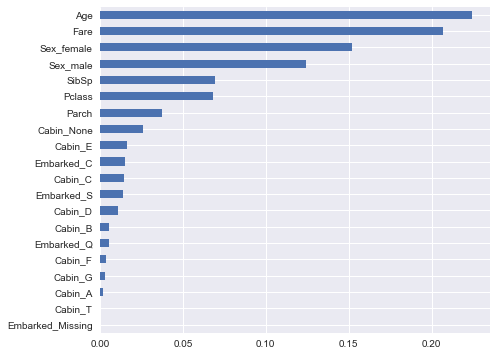

In [30]:
feature_importances = pd.Series(model_2.feature_importances_, index=X.columns)
print(feature_importances)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(7,6))

### Combine the categorical features into one feature importance

In [31]:
model_2.feature_importances_.max()

0.22424073693202651

Embarked    0.034861
Parch       0.037671
Pclass      0.068075
SibSp       0.069284
Cabin       0.082770
Fare        0.206603
Age         0.224241
Sex         0.276496
dtype: float64


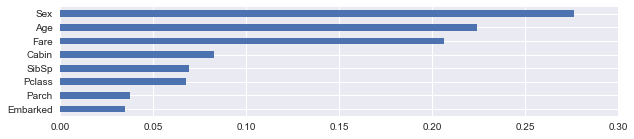

In [32]:
# Create function to combine feature importances
def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.1, width=10, summarized_columns=None):  
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns:
        for col_name in summarized_columns:
            sum_value = sum(x for i, x in feature_dict.items() if col_name in i )
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            feature_dict[col_name] = sum_value
    results = pd.Series(feature_dict, index=feature_dict.keys())
    results.sort_values(inplace=True)
    print(results)
    results.plot(kind='barh', figsize=(width, len(results)/4), xlim=(0, .30))
 
# Create combined feature importances
graph_feature_importances(model_2, X.columns, summarized_columns=categorical_variables)

# Partial Dependency Plot (Stress Testing the Model)
### How is target variable related with important features?

- It is a representation of the variables effect on the target field. 
- It can help explain the directional relationship between the features

**Explanation:**
- PClass: You have a higher chance of survival when you are from PClass 1 or 2. 
- Age: You have a higher chance of survival if you're a young kid, in your early 30's, or a senior.
- Fare: You have a higher chance of survival if you spent more money on ticket price.

In [33]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.preprocessing import Imputer

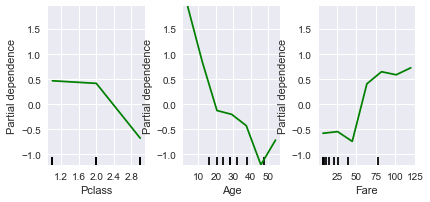

In [34]:
clf = GradientBoostingClassifier()
titanic_X_colns = ['Pclass','Age', 'Fare']
titanic_X = X_train[titanic_X_colns]
my_imputer = Imputer()
imputed_titanic_X = my_imputer.fit_transform(titanic_X)

clf.fit(imputed_titanic_X, y_train)
titanic_plots = plot_partial_dependence(clf, features=['Pclass','Age', 'Fare'], X=titanic_X, 
                                        feature_names=titanic_X_colns, grid_resolution=7)

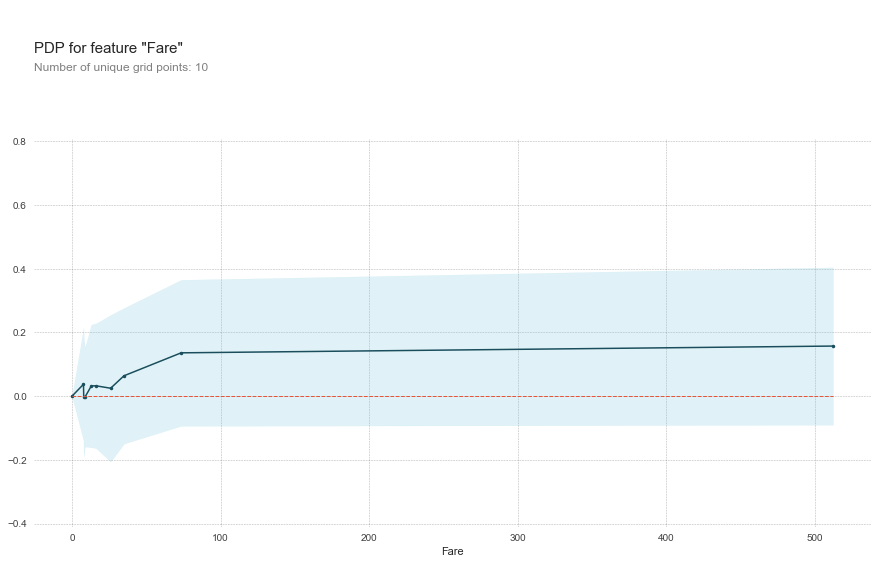

In [35]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=model_2, dataset=X_train, model_features=X_train.columns, feature='Fare')

# plot it
pdp.pdp_plot(pdp_goals, 'Fare')
plt.show()

# Conclusion

**In short:**
- It needs minimal data cleaning
- Works with both regression and classification
- It gives feature importance
- Great for exploratory modeling
- Good baseline model
- Built in cross validation
- Little hyper parameter tuning
- Treats different scaling of features similarly
- Natively detects non linear interactions